In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NOTE! Sometimes the code doesn't like the response = requests.get(url) line. In this case, 
# replace it with response = request.get(url, verify=False).

# It will give you a warning, but that's fine. 


In [2]:
# import stream gauge data
url="https://waterservices.usgs.gov/nwis/dv/?format=json&sites=12451000&startDT=2025-12-01&endDT=2025-12-31&parameterCd=00060&statCd=00003"

# download data
response = requests.get(url) 
response.raise_for_status()

# process json data
data = response.json()

# get time series data
time_series = data['value']['timeSeries']

for series in time_series:
    # get discharge values
    site_name = series['sourceInfo']['siteName']
    variable = series['variable']['variableDescription']
    values = series['values'][0]['value']
    
    print(f"Site: {site_name}")
    print(f"Variable: {variable}")
    
    # convert to dataframe
    df = pd.DataFrame(values)
    
    # convert data types of columns to ideal types
    df['dateTime'] = pd.to_datetime(df['dateTime'])
    df['value'] = pd.to_numeric(df['value'])

df=df.drop('qualifiers',axis=1)    
print(df.head())


Site: STEHEKIN RIVER AT STEHEKIN, WA
Variable: Discharge, cubic feet per second
   value   dateTime
0    705 2025-12-01
1    679 2025-12-02
2    646 2025-12-03
3    622 2025-12-04
4    636 2025-12-05


Text(0.5, 1.0, 'Discharge from Stehekin River in December 2025')

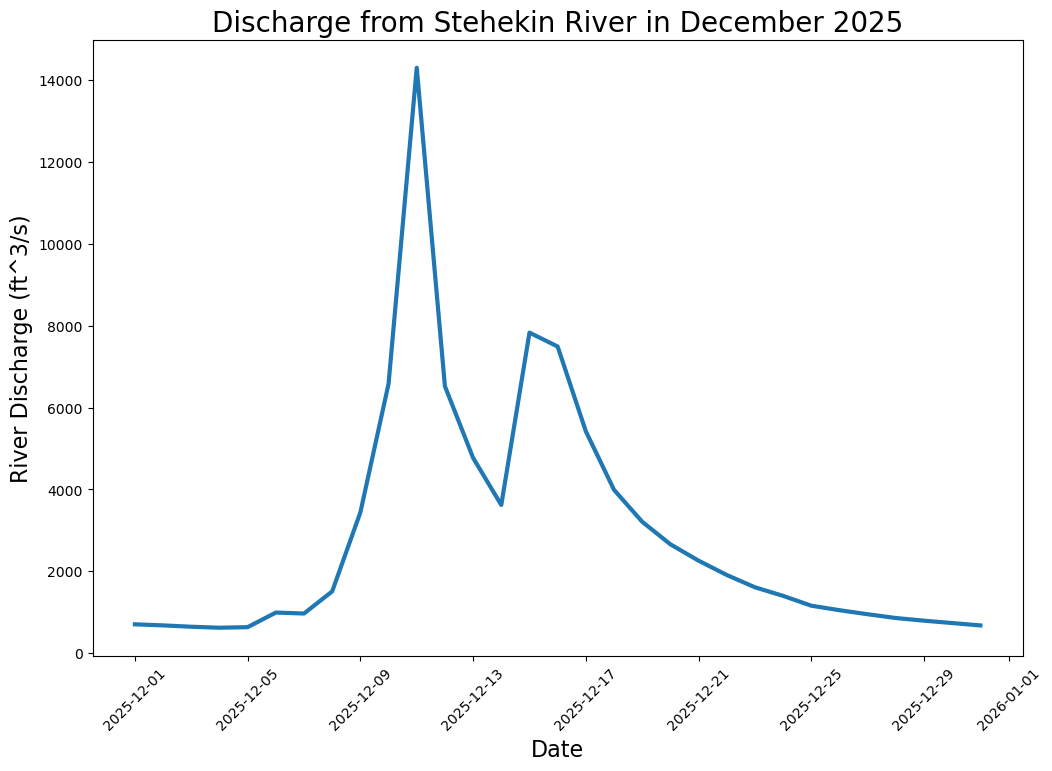

In [3]:
plt.figure(figsize=(12,8))
plt.plot(df['dateTime'],df['value'],linewidth=3);
plt.tick_params(axis='x',labelrotation=45)
plt.xlabel("Date",fontsize=16);
plt.ylabel("River Discharge (ft^3/s)",fontsize=16);
plt.title("Discharge from Stehekin River in December 2025",fontsize=20)

In [3]:
# just for fun - what was the 2025 average discharge before december?
# import stream gauge data
url="https://waterservices.usgs.gov/nwis/dv/?format=json&sites=12451000&startDT=2025-01-01&endDT=2025-12-31&parameterCd=00060&statCd=00003"

# download data
response = requests.get(url)  
response.raise_for_status()

# process json data
data = response.json()

# get time series data
time_series = data['value']['timeSeries']

for series in time_series:
    # get discharge values
    site_name = series['sourceInfo']['siteName']
    variable = series['variable']['variableDescription']
    values = series['values'][0]['value']
    
    print(f"Site: {site_name}")
    print(f"Variable: {variable}")
    
    # convert to dataframe
    df = pd.DataFrame(values)
    
    # convert data types of columns to ideal types
    df['dateTime'] = pd.to_datetime(df['dateTime'])
    df['value'] = pd.to_numeric(df['value'])

df=df.drop('qualifiers',axis=1)    
print(df.head())

Site: STEHEKIN RIVER AT STEHEKIN, WA
Variable: Discharge, cubic feet per second
   value   dateTime
0    333 2025-01-01
1    326 2025-01-02
2    324 2025-01-03
3    316 2025-01-04
4    315 2025-01-05


In [4]:
avgDischarge=np.mean(df.query("dateTime < '2025-12-01'")['value'])
print(f"""The average discharge of Stehekin River from January to November 2025 was {avgDischarge:.2f} ft^3/s""")

The average discharge of Stehekin River from January to November 2025 was 1184.32 ft^3/s


In [ ]:
## load in the precipitation data from NOAA 
#API_TOKEN = "your NOAA API token here"  request one at: https://www.ncdc.noaa.gov/cdo-web/token
BASE_URL = "https://www.ncei.noaa.gov/cdo-web/api/v2/data"

params = {
    "datasetid": "GHCND",
    "stationid": "GHCND:USC00458059",
    "datatypeid": "PRCP",
    "startdate": "2025-12-01",
    "enddate": "2025-12-31",
    "units": "metric",
    "limit": 1000
}

headers = {
    "token": API_TOKEN
}

response = requests.get(BASE_URL, headers=headers, params=params)
data = response.json()
#print(data)


{'metadata': {'resultset': {'offset': 1, 'count': 27, 'limit': 1000}}, 'results': [{'date': '2025-12-01T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:USC00458059', 'attributes': ',,H,0800', 'value': 0.0}, {'date': '2025-12-02T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:USC00458059', 'attributes': ',,H,0800', 'value': 4.1}, {'date': '2025-12-03T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:USC00458059', 'attributes': ',,H,0800', 'value': 0.0}, {'date': '2025-12-04T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:USC00458059', 'attributes': ',,H,0800', 'value': 1.5}, {'date': '2025-12-05T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:USC00458059', 'attributes': ',,H,0800', 'value': 5.1}, {'date': '2025-12-06T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:USC00458059', 'attributes': ',,H,0800', 'value': 34.8}, {'date': '2025-12-07T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:USC00458059', 'attributes': ',,H,0800', 'value': 18.3}, {'date': '2025-12-08T00:00:00', 'datatyp

In [ ]:
#create a dataframe for the precipitation data
df = pd.DataFrame(response.json()["results"])
df["datetime"] = pd.to_datetime(df["date"]) #convert date to datetime
df["precip_mm"] = df["value"] #load value data into precip_mm

df = df[["datetime", "precip_mm"]] #keep just the two variables we care about
df = df.sort_values("datetime").reset_index(drop=True) #sort by date
#print(df)
#print(df)

Text(0.5, 1.0, 'Precipitation at NOAA Station STEHEKIN 4 NW, WA, in December 2025')

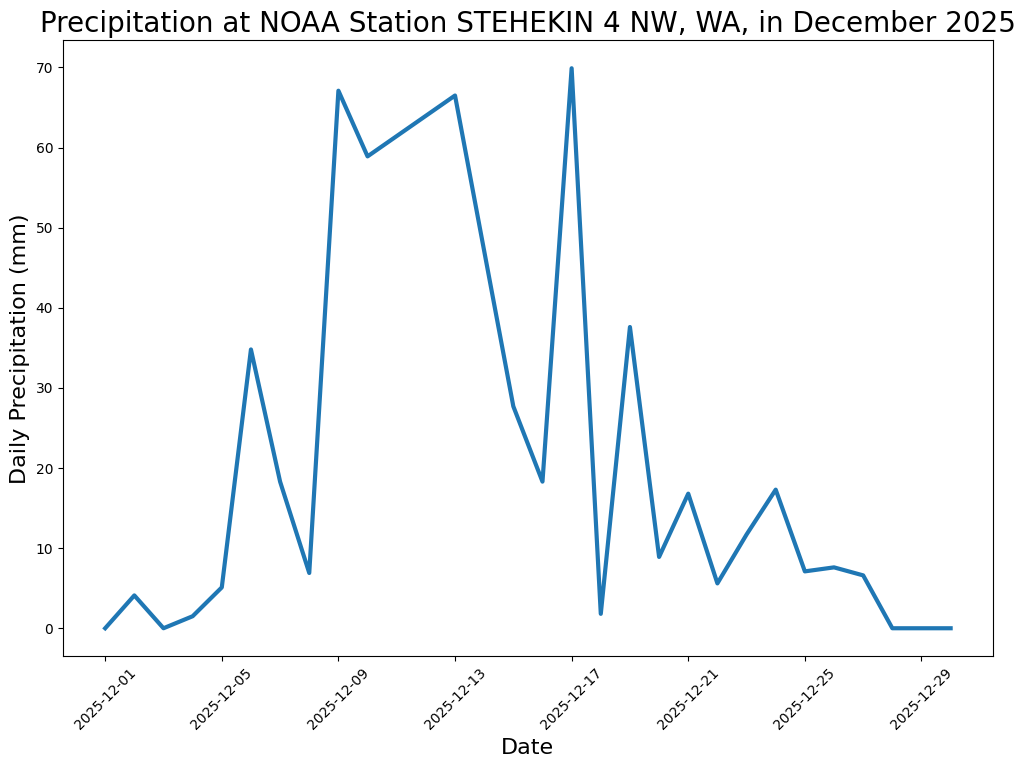

In [ ]:
#create the plot of precipitation in the month of December
plt.figure(figsize=(12,8))
plt.plot(df['datetime'],df['precip_mm'],linewidth=3);
plt.tick_params(axis='x',labelrotation=45)
plt.xlabel("Date",fontsize=16);
plt.ylabel("Daily Precipitation (mm)",fontsize=16);
plt.title("Precipitation at NOAA Station STEHEKIN 4 NW, WA, in December 2025",fontsize=20)

#precipitation stays mostly high from the 9th to the 17th

In [ ]:
#now loading in data from the whole year to get a sense of change over time
#API_TOKEN = "your NOAA API token here"  request one at: https://www.ncdc.noaa.gov/cdo-web/token

url = "https://www.ncei.noaa.gov/cdo-web/api/v2/data"

params = {
    "datasetid": "GHCND",
    "stationid": "GHCND:USC00458059",  # Stehekin 4 NW
    "datatypeid": "PRCP",
    "startdate": "2025-01-01",         
    "enddate": "2025-12-31",
    "limit": 1000
}

headers = {"token": API_TOKEN}

r = requests.get(url, headers=headers, params=params)





In [ ]:
#reload the dataframe and take a monthly average of the precipitation

df = pd.DataFrame(r.json()["results"])
df["datetime"] = pd.to_datetime(df["date"])
df["precip_mm"] = df["value"] / 10
df = df[["datetime", "precip_mm"]]
df = df.set_index("datetime").sort_index()
df = df.resample("D").mean()
monthly_avg = df["precip_mm"].resample("ME").mean()



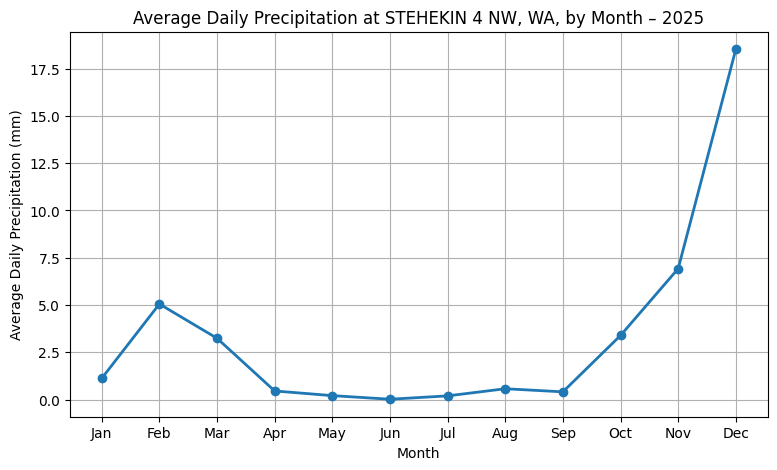

In [ ]:
#plot the monthly average with month labels
monthly_avg.index = monthly_avg.index.strftime("%b")

plt.figure(figsize=(9, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker="o", linewidth=2)
plt.xlabel("Month")
plt.ylabel("Average Daily Precipitation (mm)")
plt.title("Average Daily Precipitation at STEHEKIN 4 NW, WA, by Month – 2025")
plt.grid(True)
plt.show()
